<a href="https://colab.research.google.com/github/balajibvns442/Final_Year_Project/blob/basics/CNN_models/VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [ ]:
# Define Paths and Parameters
data_dir = '/content/drive/MyDrive/Dataset-2'
img_width, img_height = 224, 224
batch_size = 32


In [ ]:
# Data Preparation
# Only rescale because our data is already augmented
datagen = ImageDataGenerator(
    rescale=1. / 255
)

train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'valid')

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 2196 images belonging to 2 classes.
Found 232 images belonging to 2 classes.


In [ ]:
# Load VGG19 Model
base_model = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(img_width, img_height, 3)
)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Add Custom Classification Layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)  # Binary output

model = Model(inputs=base_model.input, outputs=output)

In [ ]:
# Compile Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train Model
history= model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 739s 11s/step - accuracy: 0.6796 - loss: 0.6364 - val_accuracy: 0.7845 - val_loss: 0.4329
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 213ms/step - accuracy: 0.8561 - loss: 0.3425 - val_accuracy: 0.7845 - val_loss: 0.4302
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 216ms/step - accuracy: 0.8618 - loss: 0.3282 - val_accuracy: 0.8103 - val_loss: 0.4105
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 219ms/step - accuracy: 0.8838 - loss: 0.2756 - val_accuracy: 0.8319 - val_loss: 0.3451
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 221ms/step - accuracy: 0.8978 - loss: 0.2381 - val_accuracy: 0.8319 - val_loss: 0.3190
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 224ms/step - accuracy: 0.9405 - loss: 0.1768 - val_accuracy: 0.8405 - val_loss: 0.2997
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - accuracy: 0.9461 - loss: 0.1525 - val_accuracy: 0.8362 - val_loss: 0.3418
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 227ms/step - accuracy: 0.9583 - loss: 0.1433 - val_accur

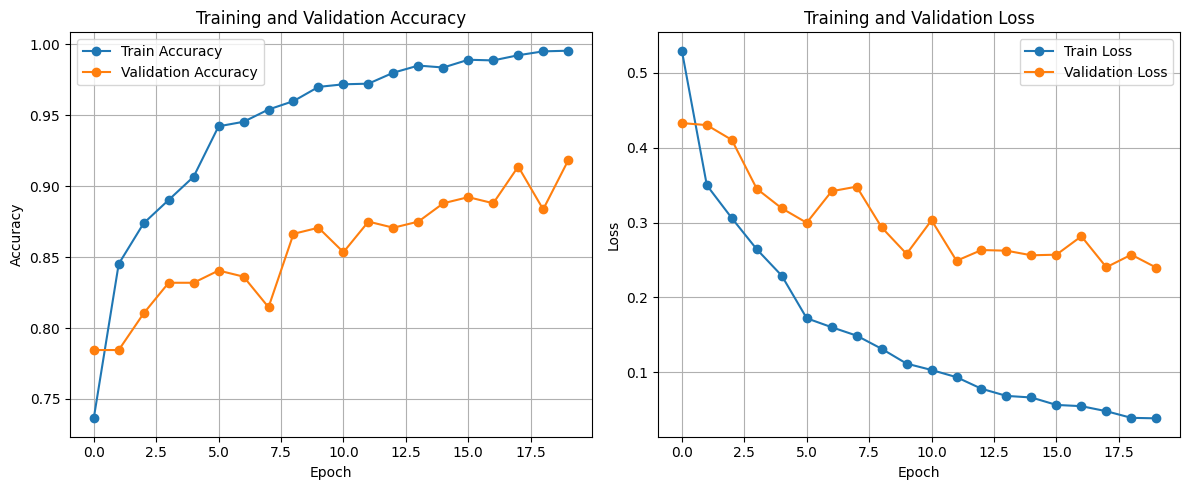

In [ ]:

# Plot Training and Validation Accuracy/Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(validation_generator)
y_pred_classes = (y_pred > 0.5).astype("int32")
y_true = validation_generator.classes

print(confusion_matrix(y_true, y_pred_classes))
print(classification_report(y_true, y_pred_classes))


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 276ms/step
[[77 55]
 [66 34]]
              precision    recall  f1-score   support

           0       0.54      0.58      0.56       132
           1       0.38      0.34      0.36       100

    accuracy                           0.48       232
   macro avg       0.46      0.46      0.46       232
weighted avg       0.47      0.48      0.47       232



In [ ]:
# Save the trained model

model.save('cancer_non_cancer_model.keras')




print("Model saved successfully!")

Model saved successfully!


In [ ]:
from google.colab import files

files.download('cancer_non_cancer_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the saved model
loaded_model = tf.keras.models.load_model('cancer_non_cancer_model.keras')

# Function to predict on a single image
def predict_single_image(image_path, model, img_width, img_height):
    """
    Loads an image, preprocesses it, and makes a prediction using the loaded model.

    Args:
        image_path (str): Path to the image file.
        model (tf.keras.Model): Loaded TensorFlow Keras model.
        img_width (int): Target image width.
        img_height (int): Target image height.

    Returns:
        float: Prediction probability (close to 1 for non-cancer, close to 0 for cancer).
    """
    img = load_img(image_path, target_size=(img_width, img_height))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch
    img_array /= 255.0  # Rescale the image

    prediction = model.predict(img_array)
    return prediction[0][0]

# Example usage: Replace 'path/to/your/new_image.jpg' with the actual image path you want to predict on
# Make sure to upload the image to your Colab environment or provide the correct path
image_path_for_prediction = '/content/drive/MyDrive/Dataset-2/train/cancer/100.jpg' # Replace with your image path

prediction_probability = predict_single_image(image_path_for_prediction, loaded_model, img_width, img_height)

# Interpret the prediction based on the class indices
class_labels = list(train_generator.class_indices.keys()) # Get class labels from the generator
predicted_class_index = int(round(prediction_probability)) # Round to get class index (0 or 1)
predicted_class_label = class_labels[predicted_class_index]


print(f"The model predicts the image is {predicted_class_label.upper()} with a probability of {prediction_probability:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The model predicts the image is CANCER with a probability of 0.0242


Saving image_0082.jpg to image_0082.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
The model predicts the uploaded image 'image_0082.jpg' is NON-CANCER with a probability of 0.9999


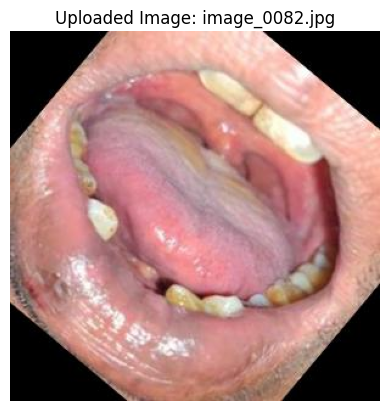

In [ ]:
from google.colab import files
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load the saved model (assuming it's already loaded in 'loaded_model' variable)
# If not, uncomment the line below:
# loaded_model = tf.keras.models.load_model('cancer_non_cancer_model.keras')


# Function to predict on a single image
def predict_single_image(image_path, model, img_width, img_height, class_labels):
    """
    Loads an image, preprocesses it, and makes a prediction using the loaded model.

    Args:
        image_path (str): Path to the image file.
        model (tf.keras.Model): Loaded TensorFlow Keras model.
        img_width (int): Target image width.
        img_height (int): Target image height.
        class_labels (list): List of class labels (e.g., ['cancer', 'non-cancer']).

    Returns:
        tuple: (predicted_class_label, prediction_probability)
    """
    img = load_img(image_path, target_size=(img_width, img_height))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch
    img_array /= 255.0  # Rescale the image

    prediction = model.predict(img_array)
    prediction_probability = prediction[0][0]

    # Interpret the prediction based on the class indices
    predicted_class_index = int(round(prediction_probability)) # Round to get class index (0 or 1)
    predicted_class_label = class_labels[predicted_class_index]

    return predicted_class_label, prediction_probability

# Get class labels from the generator (assuming train_generator is available)
# If not, you can define them manually based on your dataset:
# class_labels = ['cancer', 'non-cancer']
class_labels = list(train_generator.class_indices.keys())


# Upload an image
uploaded = files.upload()

for fn in uploaded.keys():
    # Predict on the uploaded image
    image_path_for_prediction = fn
    predicted_label, prediction_prob = predict_single_image(image_path_for_prediction, loaded_model, img_width, img_height, class_labels)

    print(f"The model predicts the uploaded image '{fn}' is {predicted_label.upper()} with a probability of {prediction_prob:.4f}")

    # Optional: Display the uploaded image
    img = load_img(image_path_for_prediction)
    plt.imshow(img)
    plt.title(f"Uploaded Image: {fn}")
    plt.axis('off')
    plt.show()